In [36]:
import os
import numpy as np
import pandas as pd
from pykrige.ok3d import OrdinaryKriging3D
from pykrige.uk3d import UniversalKriging3D
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import neighbors
from math import sqrt

In [37]:
df=pd.read_excel("C:\\Users\\fguer\\Downloads\Lito_860_teste.xls")

In [38]:
df

,BHID,Z,X,Y,CaO,MgO,SiO2,Fe2O3,Al2O3,SO3
0,FS01,1.75,726049,7271890,40.07,6.50,15.82,0.93,2.19,0.20
1,FS01,3.60,726049,7271890,37.17,6.74,20.25,1.00,2.28,0.20
2,FS01,5.05,726049,7271890,44.97,5.31,9.37,0.71,1.49,0.20
3,FS01,6.50,726049,7271890,45.05,4.79,8.50,0.66,2.00,0.20
4,FS01,8.05,726049,7271890,44.40,5.39,7.76,0.80,1.55,0.20
...,...,...,...,...,...,...,...,...,...,...
2967,FS27,383.30,725602,7270788,36.50,5.40,19.55,2.91,4.26,0.33
2968,FS27,385.30,725602,7270788,12.65,3.50,50.00,6.41,11.85,4.10
2969,FS27,387.30,725602,7270788,5.56,3.93,58.80,5.23,13.25,1.94
2970,FS27,389.30,725602,7270788,8.62,8.76,50.90,8.22,10.75,0.78


In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
df.rename(columns={"CaO":"A",'MgO':'B', 'SiO2':'C', 'Fe2O3':'D', 'Al2O3':'E', 'SO3':'F'}, inplace = True)

In [41]:
df

,BHID,Z,X,Y,A,B,C,D,E,F
0,FS01,1.75,726049,7271890,40.07,6.50,15.82,0.93,2.19,0.20
1,FS01,3.60,726049,7271890,37.17,6.74,20.25,1.00,2.28,0.20
2,FS01,5.05,726049,7271890,44.97,5.31,9.37,0.71,1.49,0.20
3,FS01,6.50,726049,7271890,45.05,4.79,8.50,0.66,2.00,0.20
4,FS01,8.05,726049,7271890,44.40,5.39,7.76,0.80,1.55,0.20
...,...,...,...,...,...,...,...,...,...,...
2967,FS27,383.30,725602,7270788,36.50,5.40,19.55,2.91,4.26,0.33
2968,FS27,385.30,725602,7270788,12.65,3.50,50.00,6.41,11.85,4.10
2969,FS27,387.30,725602,7270788,5.56,3.93,58.80,5.23,13.25,1.94
2970,FS27,389.30,725602,7270788,8.62,8.76,50.90,8.22,10.75,0.78


In [69]:
df.describe()

,Z,X,Y,A,B,C,D,E,F
count,2972.000000,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,196.111306,725922.979812,7.024850e+06,42.126538,5.298974,12.992537,1.299044,2.531706,0.304209
std,125.770172,176.949653,1.246462e+06,11.344508,4.648139,12.673192,1.593727,2.668561,0.351546
min,0.000000,725597.000000,7.271770e+05,0.050000,0.140000,0.650000,0.020000,0.090000,0.010000
25%,92.000000,725778.000000,7.271152e+06,39.800000,2.220000,4.630000,0.460000,0.930000,0.110000
50%,182.125000,725964.000000,7.271497e+06,45.900000,4.050000,8.055000,0.800000,1.720000,0.240000
75%,284.000000,726049.000000,7.271879e+06,50.400000,5.962500,15.362500,1.530000,3.042500,0.390000
max,568.700000,726225.000000,7.271988e+06,55.900000,19.850000,97.800000,12.220000,18.000000,5.590000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BHID    2972 non-null   object 
 1   Z       2972 non-null   float64
 2   X       2972 non-null   int64  
 3   Y       2972 non-null   int64  
 4   A       2972 non-null   float64
 5   B       2972 non-null   float64
 6   C       2972 non-null   float64
 7   D       2972 non-null   float64
 8   E       2972 non-null   float64
 9   F       2972 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 232.3+ KB


In [42]:
dfd=df.drop('BHID',1)

In [43]:
X = dfd[['X','Y','Z','B','C','D','E','F']]
y= dfd['A']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state = 42)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2823, 8)
(149, 8)
(2823,)
(149,)


In [46]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

StandardScaler()

In [47]:
dfstd = scaler.transform(X_train)

In [48]:
dfstd.shape

(2377, 8)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
error_rmse = sqrt(mean_squared_error(y_test,pred))
error_abs = mean_absolute_error(y_test,pred)
error_r2 = r2_score(y_test,pred)

In [51]:
rmse_val_MINK = []
abs_val_MINK = []
r2_val_MINK = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error_rmse = sqrt(mean_squared_error(y_test,pred))
    rmse_val_MINK.append(error_rmse)
    error_abs = mean_absolute_error(y_test,pred)
    abs_val_MINK.append(error_abs) 
    error_r2 = r2_score(y_test,pred)
    r2_val_MINK.append(error_r2)
    
    print('RMSE value for k= ' , K , 'is:', error_rmse)
    print('ABS value for k= ' , K , 'is:', error_abs)
    print('R2 value for k= ' , K , 'is:', error_r2)

RMSE value for k=  1 is: 3.817991398540302
ABS value for k=  1 is: 2.364218487394958
R2 value for k=  1 is: 0.8846048693773841
RMSE value for k=  2 is: 4.412983517917528
ABS value for k=  2 is: 2.520403361344538
R2 value for k=  2 is: 0.8458362724667857
RMSE value for k=  3 is: 4.681157080820167
ABS value for k=  3 is: 2.5839943977591036
R2 value for k=  3 is: 0.8265301428299922
RMSE value for k=  4 is: 4.943742993918269
ABS value for k=  4 is: 2.7149159663865547
R2 value for k=  4 is: 0.8065229920540753
RMSE value for k=  5 is: 5.1523507487995674
ABS value for k=  5 is: 2.8295731092436975
R2 value for k=  5 is: 0.7898504655984182
RMSE value for k=  6 is: 5.3471415686497465
ABS value for k=  6 is: 2.935532212885154
R2 value for k=  6 is: 0.773660184936602
RMSE value for k=  7 is: 5.54595061601653
ABS value for k=  7 is: 3.045188475390156
R2 value for k=  7 is: 0.7565164708547675
RMSE value for k=  8 is: 5.7459692204220705
ABS value for k=  8 is: 3.1730987394957983
R2 value for k=  8 is

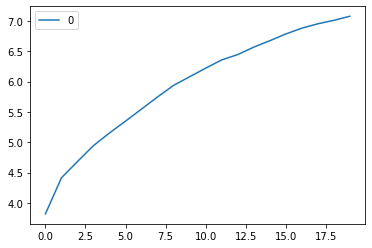

In [52]:
curve = pd.DataFrame(rmse_val_MINK)  
curve.plot()

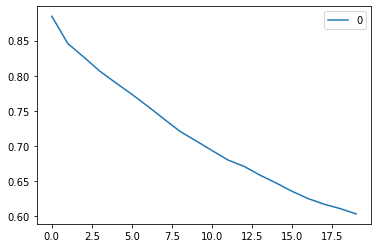

In [53]:
curve = pd.DataFrame(r2_val_MINK)  
curve.plot()

In [96]:
rmse_val_MANH = []
abs_val_MANH = []
r2_val_MANH = []
for K in range(20):
    K = K+1
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan')
    
    model2.fit(X_train, y_train)
    pred=model2.predict(X_test)
    error_rmse = sqrt(mean_squared_error(y_test,pred))
    rmse_val_MANH.append(error_rmse)
    error_abs = mean_absolute_error(y_test,pred)
    abs_val_MANH.append(error_abs) 
    error_r2 = r2_score(y_test,pred)
    r2_val_MANH.append(error_r2)
    
    print('RMSE value for k= ' , K , 'is:', error_rmse)
    print('ABS value for k= ' , K , 'is:', error_abs)
    print('R2 value for k= ' , K , 'is:', error_r2)



RMSE value for k=  1 is: 2.929832324496477
ABS value for k=  1 is: 1.9250335570469796
R2 value for k=  1 is: 0.9313761101994888
RMSE value for k=  2 is: 3.3999032383586067
ABS value for k=  2 is: 2.06739932885906
R2 value for k=  2 is: 0.9075891609747525
RMSE value for k=  3 is: 3.711063698362439
ABS value for k=  3 is: 2.0862304250559287
R2 value for k=  3 is: 0.8899001780277546
RMSE value for k=  4 is: 4.343845531516728
ABS value for k=  4 is: 2.327214765100671
R2 value for k=  4 is: 0.8491523511717525
RMSE value for k=  5 is: 4.832456705660231
ABS value for k=  5 is: 2.5180335570469796
R2 value for k=  5 is: 0.8133079851752173
RMSE value for k=  6 is: 5.103642114761817
ABS value for k=  6 is: 2.67177293064877
R2 value for k=  6 is: 0.7917666796627881
RMSE value for k=  7 is: 5.314503088369685
ABS value for k=  7 is: 2.7645158197507196
R2 value for k=  7 is: 0.7742045810010595
RMSE value for k=  8 is: 5.588430646337679
ABS value for k=  8 is: 2.9061409395973152
R2 value for k=  8 is:

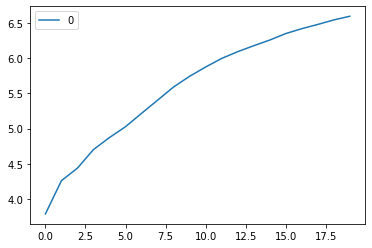

In [55]:
curve_rmse_MANH = pd.DataFrame(rmse_val_MANH)  
curve_rmse_MANH.plot()

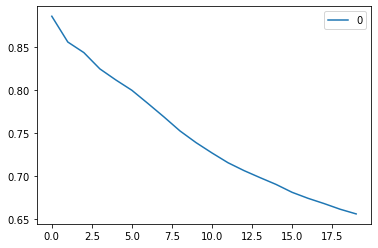

In [56]:
curve_r2_MANH = pd.DataFrame(r2_val_MANH)  
curve_r2_MANH.plot()

In [107]:
rmse_val_MANH = []
abs_val_MANH = []
r2_val_MANH = []
for K in range(40):
    K = K+1
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan')
    
    model2.fit(X_train, y_train)
    pred=model2.predict(X_test)
    error_rmse = sqrt(mean_squared_error(y_test,pred))
    rmse_val_MANH.append(error_rmse)
    error_abs = mean_absolute_error(y_test,pred)
    abs_val_MANH.append(error_abs) 
    error_r2 = r2_score(y_test,pred)
    r2_val_MANH.append(error_r2)
   

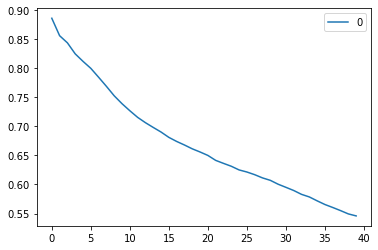

In [61]:
curve_r2_MANH = pd.DataFrame(r2_val_MANH)  
curve_r2_MANH.plot()

In [ ]:
dfstd = scaler.transform(X_train)

In [108]:
rmse_val_MANH = []
abs_val_MANH = []
r2_val_MANH1 = []
for K in range(40):
    K = K+1
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan')
    
    model2.fit(X_train, y_train)
    pred=model2.predict(X_train)
    error_rmse = sqrt(mean_squared_error(y_train,pred))
    rmse_val_MANH.append(error_rmse)
    error_abs = mean_absolute_error(y_train,pred)
    abs_val_MANH.append(error_abs) 
    error_r2 = r2_score(y_train,pred)
    r2_val_MANH1.append(error_r2)

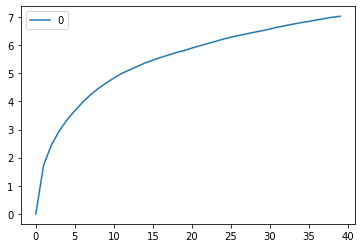

In [65]:
curve_rmse_MANH = pd.DataFrame(rmse_val_MANH)  
curve_rmse_MANH.plot()

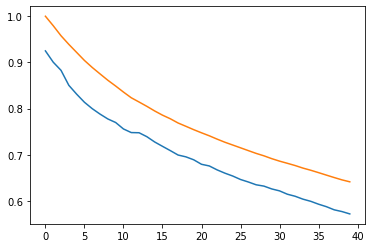

In [110]:
curve_r2_MANH = pd.DataFrame(r2_val_MANH)  
plt.plot(curve_r2_MANH)
curve_r2_MANH1 = pd.DataFrame(r2_val_MANH1)  
plt.plot(curve_r2_MANH1)

In [111]:
curve_r2_MANH

,0
0,0.925015
1,0.900592
2,0.882896
3,0.850497
4,0.831389
5,0.813838
6,0.799977
7,0.788216
8,0.777700
9,0.770030
